In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [7]:
results_dir = r'../results'
filenames = os.listdir(results_dir)
print(filenames, "\n\nwe'll use", filenames[1])
df = pd.read_csv(os.path.join(results_dir, filenames[1]))
df['Log2ArraySize'] = np.log2(df['ArraySize'])
df

['results_old_openmp.csv', 'results_openmp_cutoff20_medianofthree.csv', 'results_openmp_cutoff32.csv', 'results_openmp_cutoff20.csv', 'results_openmp_cutoff1024.csv'] 

we'll use results_openmp_cutoff20_medianofthree.csv


,Threads,ArraySize,Time,Log2ArraySize
0,1,65536,0.004527,16.0
1,1,65536,0.004354,16.0
2,1,65536,0.004356,16.0
3,1,131072,0.009239,17.0
4,1,131072,0.009168,17.0
...,...,...,...,...
220,12,536870912,12.813388,29.0
221,12,536870912,12.075395,29.0
222,12,1073741824,29.768128,30.0
223,12,1073741824,28.818007,30.0


In [8]:
grouped = df.groupby(['Threads', 'ArraySize']).agg({
    'Time': ['mean', 'std']
}).reset_index()
grouped['Log2MatrixSize'] = np.log2(grouped['ArraySize'])
grouped['Log2MatrixSize'] = grouped['Log2MatrixSize'].astype(int)
grouped.columns = ['Threads', 'ArraySize', 'MeanTime', 'StdTime', 'Log2MatrixSize']
#grouped = grouped[grouped['Log2MatrixSize'] > 4]
grouped

,Threads,ArraySize,MeanTime,StdTime,Log2MatrixSize
0,1,65536,0.004412,0.000099,16
1,1,131072,0.009556,0.000611,17
2,1,262144,0.019923,0.000249,18
3,1,524288,0.042261,0.000470,19
4,1,1048576,0.088311,0.000991,20
...,...,...,...,...,...
70,12,67108864,1.584297,0.045326,26
71,12,134217728,3.305167,0.142840,27
72,12,268435456,6.680810,0.205142,28
73,12,536870912,12.322263,0.425328,29


In [9]:
#grouped.to_csv('table.csv')

    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
0         1      65536  0.004412  0.000099              16
15        2      65536  0.002930  0.000185              16
30        4      65536  0.002579  0.000350              16
45        8      65536  0.001701  0.000244              16
60       12      65536  0.003237  0.002974              16
    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
1         1     131072  0.009556  0.000611              17
16        2     131072  0.005783  0.000272              17
31        4     131072  0.003965  0.000025              17
46        8     131072  0.003708  0.000089              17
61       12     131072  0.005615  0.002422              17
    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
2         1     262144  0.019923  0.000249              18
17        2     262144  0.012560  0.000247              18
32        4     262144  0.009237  0.000638              18
47        8     262144  0.006595  0.000351              

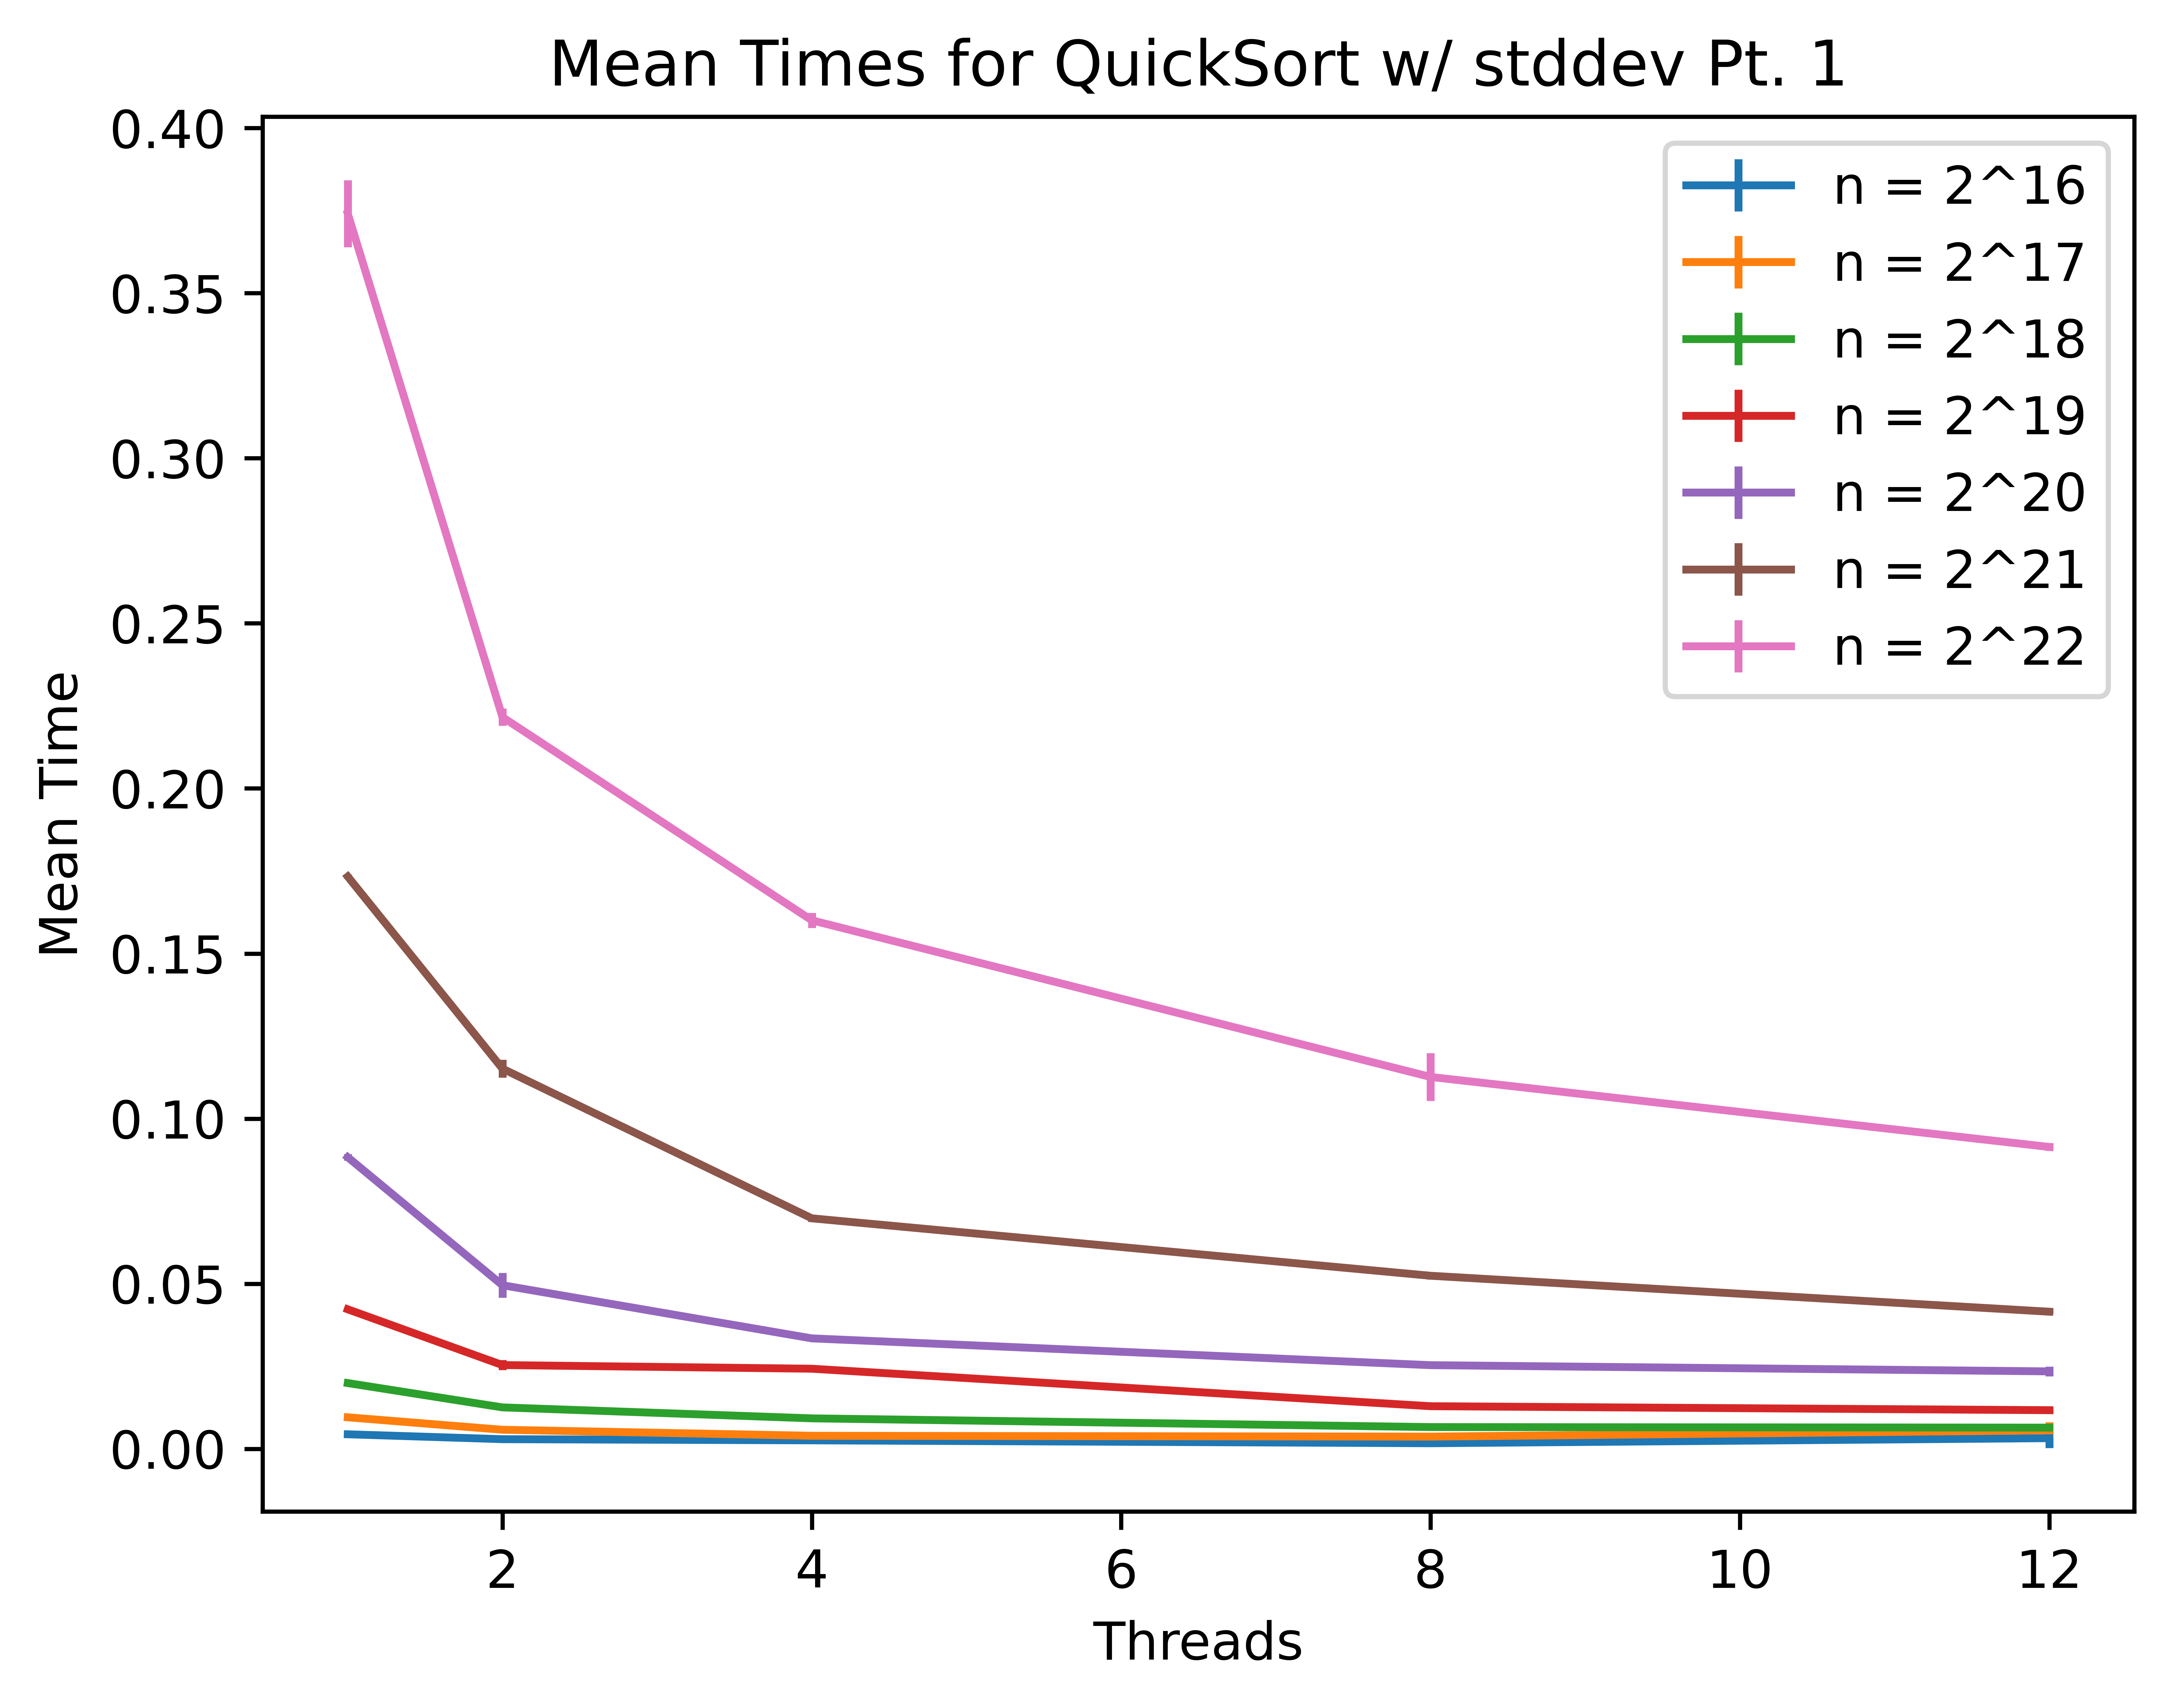

In [12]:
least = 16
most = 30
mid = (least + most) // 2
plt.figure(dpi=1200)

for i in range(least, mid):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")

plt.title(f"Mean Times for QuickSort w/ stddev Pt. 1")
plt.legend(loc='upper right')
plt.savefig('results1.png')
plt.show()

    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
7         1    8388608  0.795468  0.004376              23
22        2    8388608  0.451468  0.005853              23
37        4    8388608  0.370628  0.003538              23
52        8    8388608  0.239230  0.005258              23
67       12    8388608  0.205006  0.007376              23
    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
8         1   16777216  1.627713  0.004277              24
23        2   16777216  1.077642  0.142262              24
38        4   16777216  0.671053  0.058972              24
53        8   16777216  0.478702  0.015883              24
68       12   16777216  0.372222  0.005445              24
    Threads  ArraySize  MeanTime   StdTime  Log2MatrixSize
9         1   33554432  3.456353  0.077131              25
24        2   33554432  1.927082  0.062476              25
39        4   33554432  1.447456  0.170392              25
54        8   33554432  0.856430  0.137468              

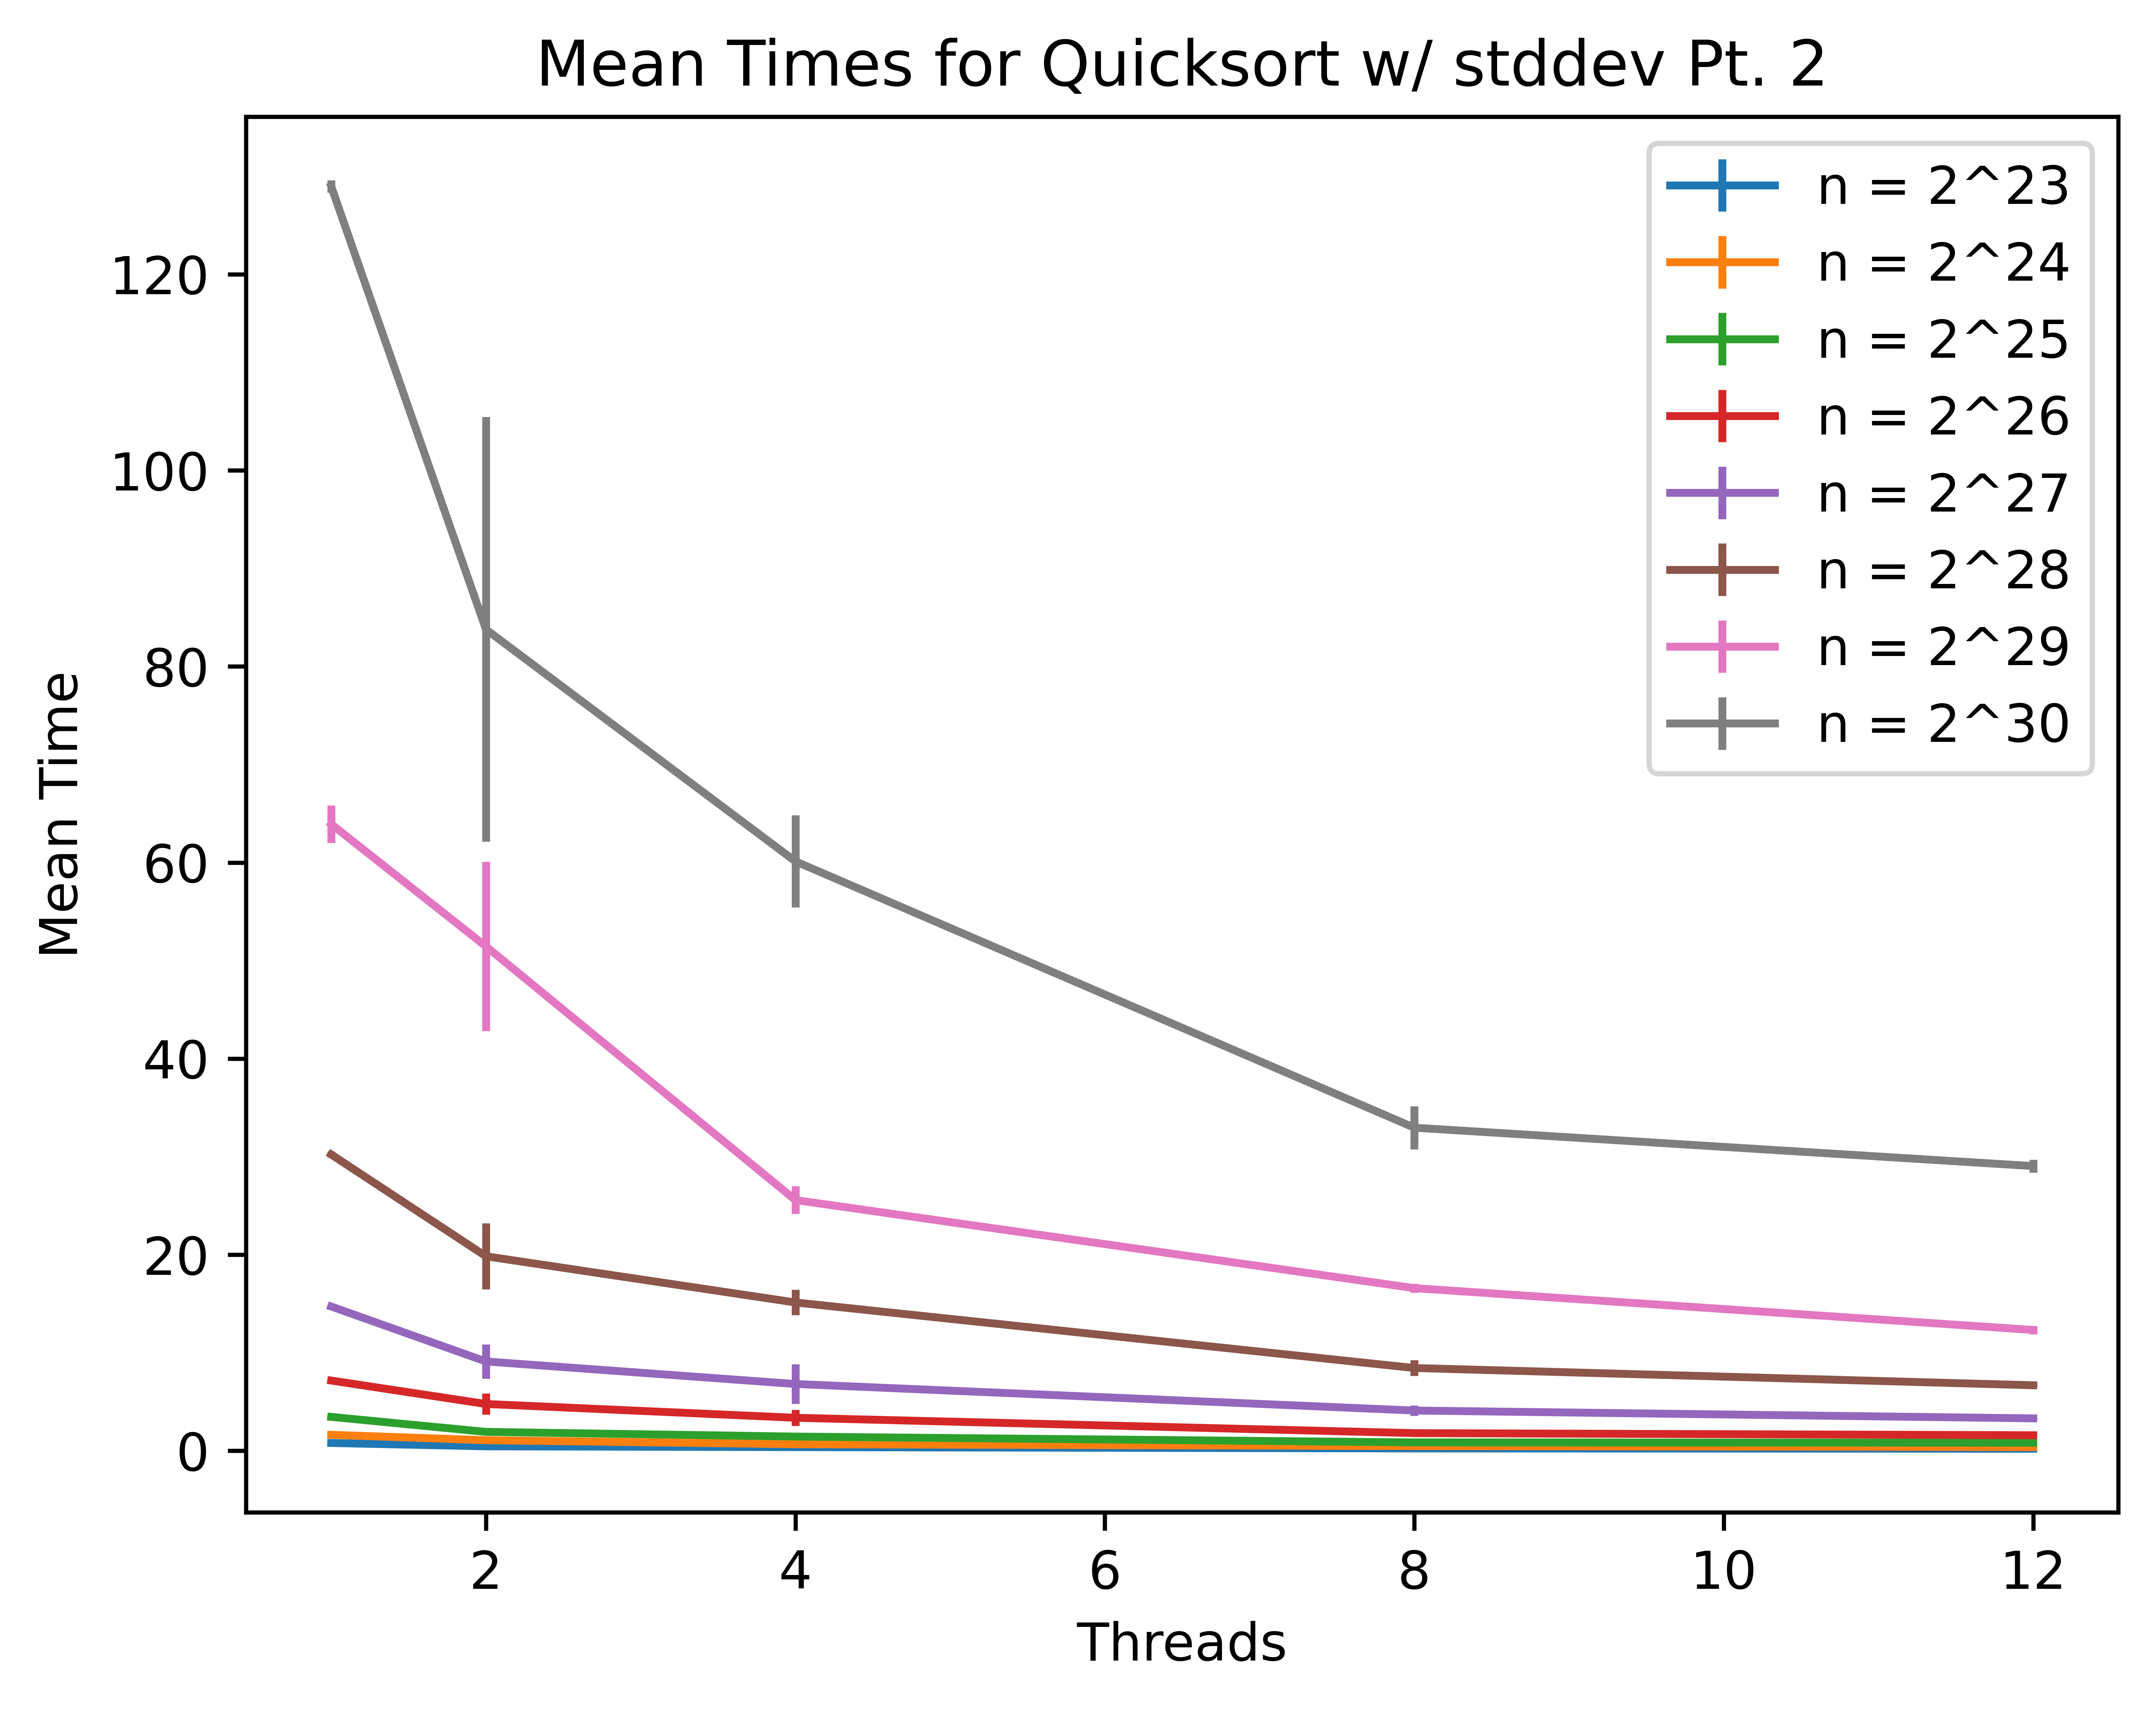

In [13]:
plt.figure(dpi=1200)

for i in range(mid, most+1):
    temp = grouped[grouped['Log2MatrixSize'] == i]
    print(temp)
    plt.errorbar(temp['Threads'], temp['MeanTime'], yerr=temp['StdTime'], label=f"n = 2^{i}")
    plt.xlabel("Threads")
    plt.ylabel("Mean Time")
plt.title(f"Mean Times for Quicksort w/ stddev Pt. 2")
plt.legend(loc='upper right')
plt.savefig('results2.png')
plt.show()